In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from oetils.plotting import init_plotting

In [2]:
W = init_plotting(latex=True)

In [3]:
data = pd.DataFrame({
    'd': [0, 0.05, 0.10, 0.15, 0.25, 0.30, 0.35, 0.40],
    'v': [0, 0.85, 1.11, 1.24, 1.26, 1.14, 0.90, 0.36]
})
data

,d,v
0,0.00,0.00
1,0.05,0.85
2,0.10,1.11
3,0.15,1.24
4,0.25,1.26
5,0.30,1.14
6,0.35,0.90
7,0.40,0.36


In [4]:
# Polynomial features and labels
X = np.hstack([(data.d.values**i)[:, None] for i in range(3)])
y = data.v.values**2

In [5]:
# Fit curve to data (OLS)
w = np.linalg.solve(X.T @ X, X.T @ y)

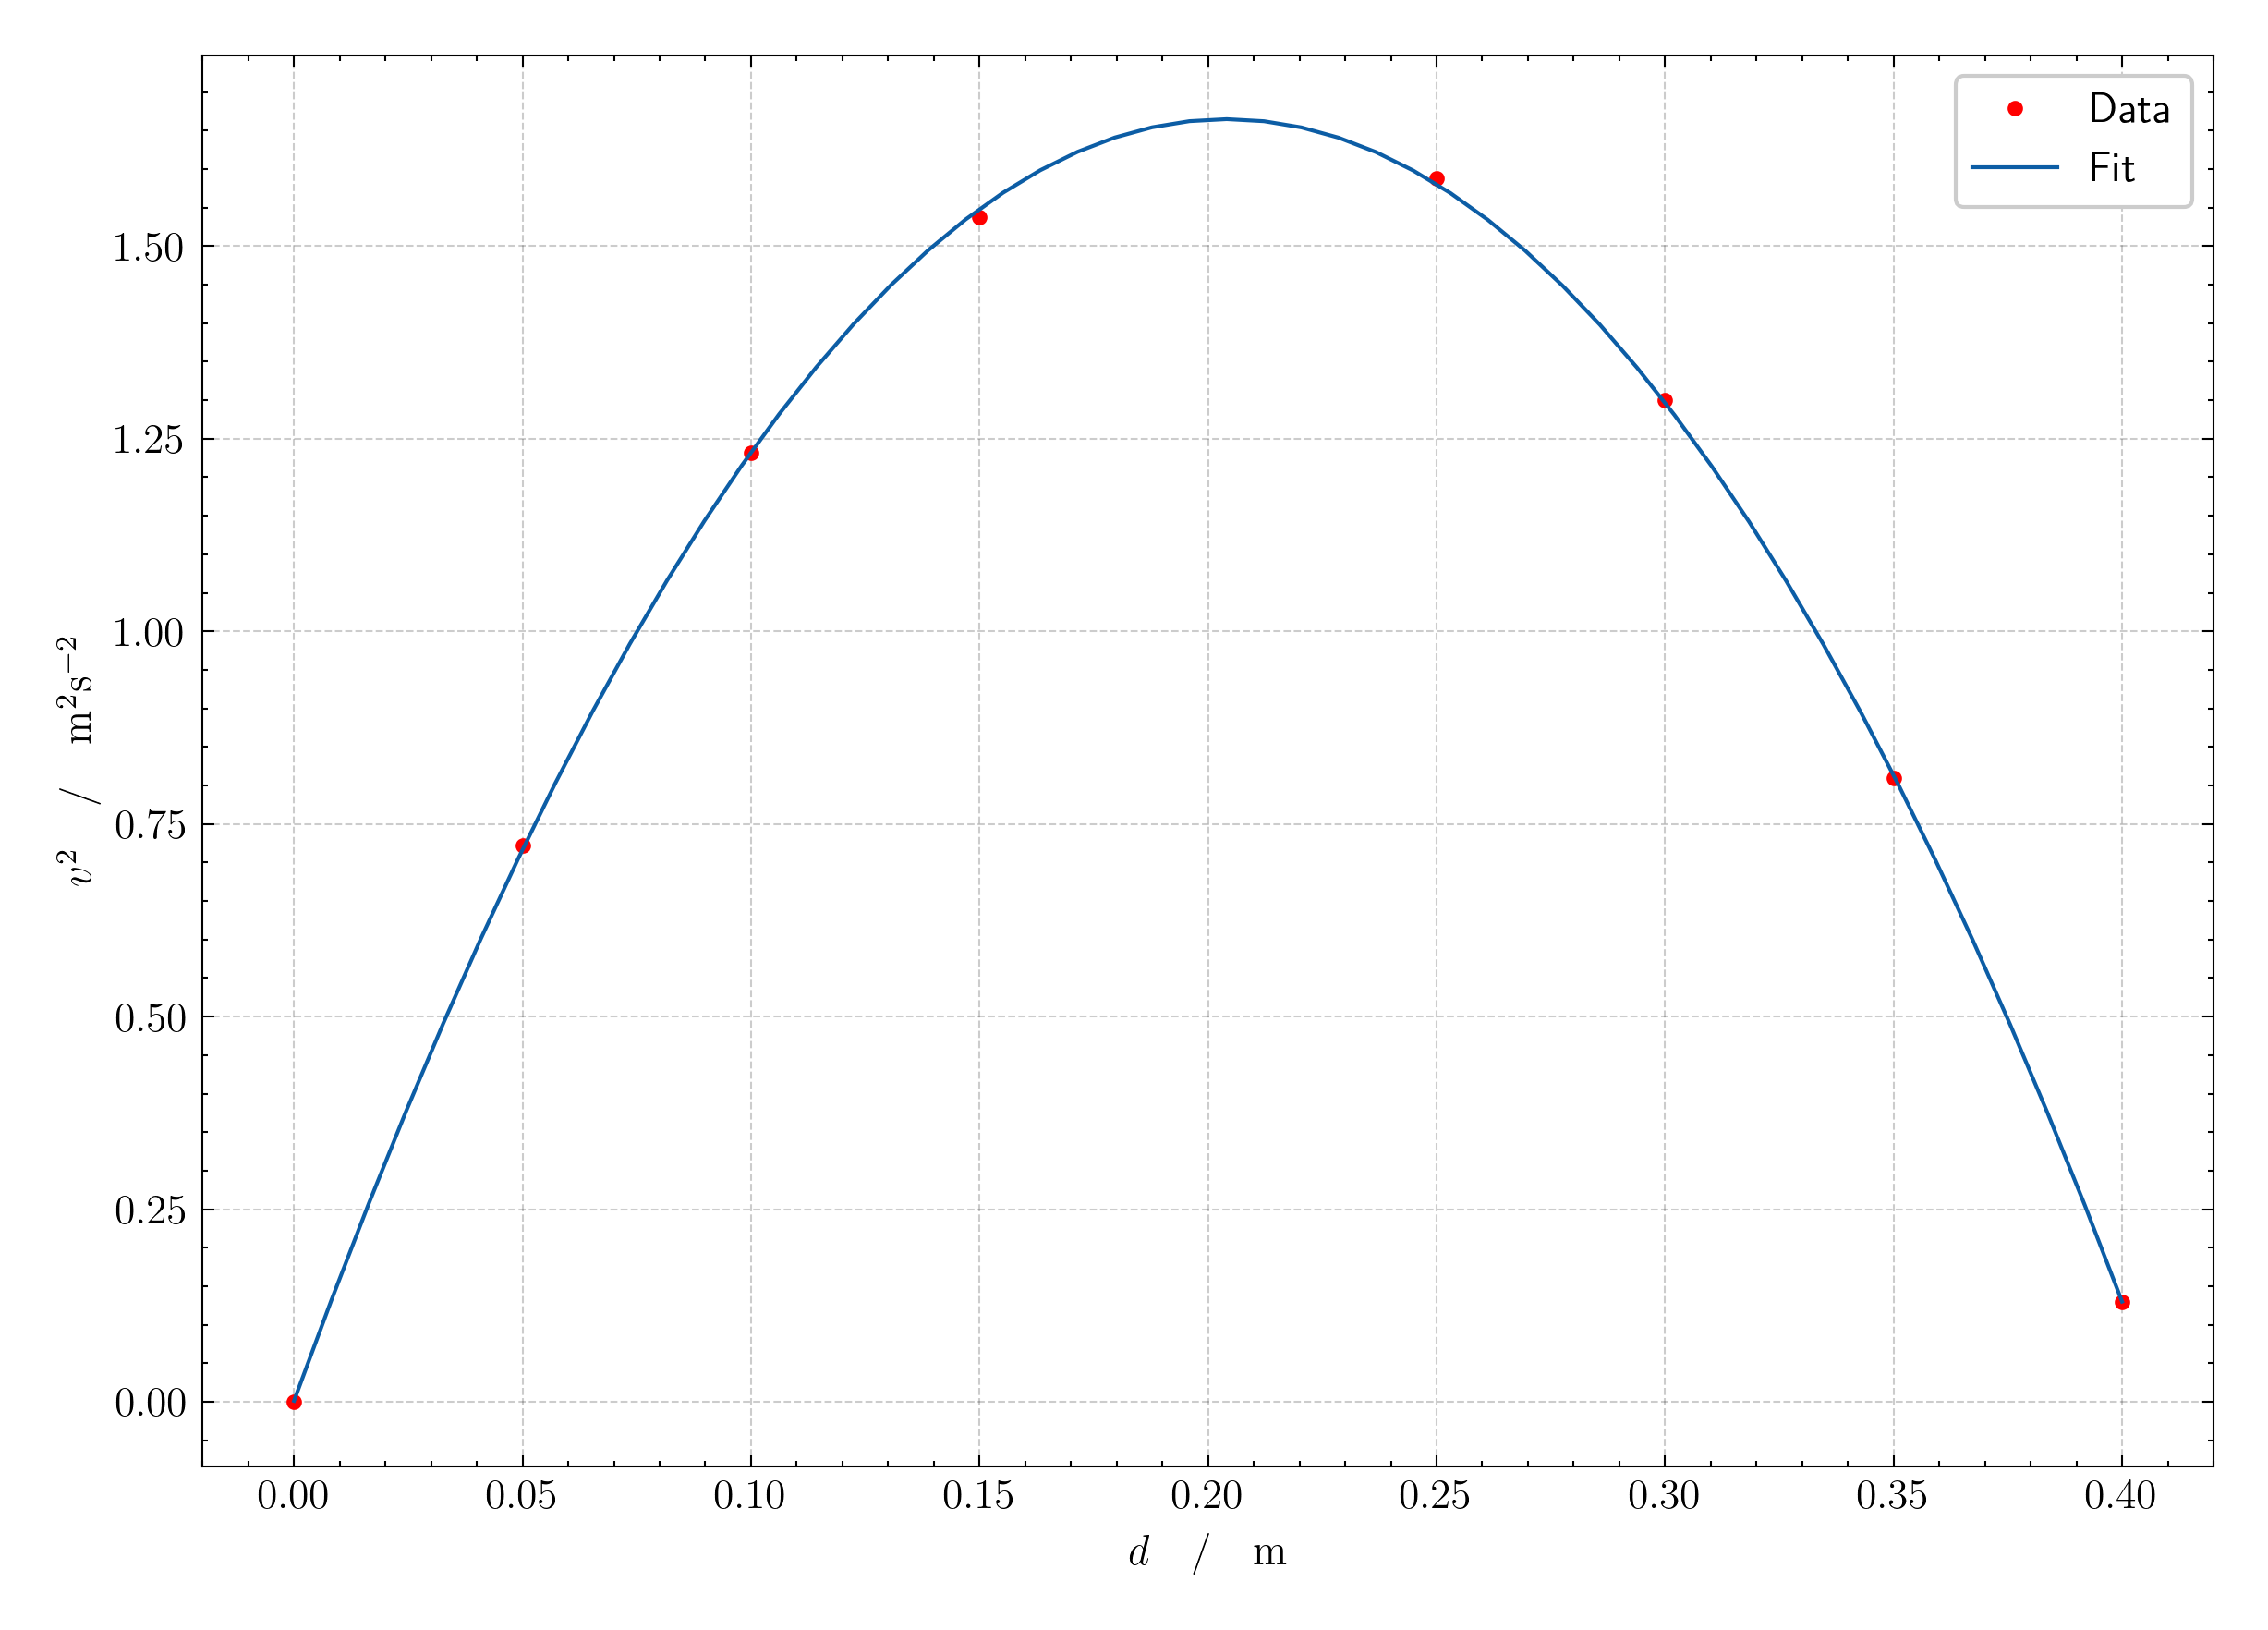

In [6]:
fig, ax = plt.subplots()
ax.set_xlabel(r"$d\quad/\quad\mathrm{m}$")
ax.set_ylabel(r"$v^2\quad/\quad\mathrm{m^2s^{-2}}$")
ax.plot(data.d, data.v**2, 'r.', label="Data")
x = np.linspace(data.d.min(), data.d.max())
ax.plot(x, sum(w[i] * x**i for i in range(3)), label="Fit")
ax.legend()

In [7]:
w

array([ 1.32507752e-03,  1.63060907e+01, -3.99603101e+01])

In [8]:
m = 0.3
d0 = 0.4
g = 9.81
k = -w[2] * m
mu = (-w[1]/2 + k*d0/m) / g

In [9]:
print("k =", k)
print("mu =", mu)

k = 11.988093023255878
mu = 0.7982750950224856
